In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
from imblearn.over_sampling import RandomOverSampler
from collections import Counter



from sklearn.metrics import precision_recall_fscore_support 
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


In [2]:
df = pd.read_json('DiSmldata.json')

In [3]:
my_stop_words = ENGLISH_STOP_WORDS.union(['disneyland','tokyo','disney', 'im', 'tdrnow','paris','california','amp','disneysea','got',
                                         'ºc', 'ºf', 'ºoº','𝗧𝗵𝗲','くまのプーさん', 'ディズニー', 'ディズニーシー','ディズニーハロウィーン',
                                         'ディズニーランド', 'ディズニー好きと繋がりたい', 'フェスティバルオブミスティーク', 'マルマン',
                                         'ㅋㅋㅋ', '場所', '更新', '月released', '東京ディズニーシー', '東京ディズニーランド', '東京ディズニーリゾート',
                                         '香港迪士尼樂園', 'ºº', 'hong', 'kong',"disneylandresort", "disneyland", "disneyresort",
                                          "californiaadventure",'downtowndisney','disneyanaheim','disneylandanaheim',
                                          'disneycalifornia','californiadisney','disneysea', 'disneytokyo', 'disneytokyoresort', 
                                          'tokyodisney','tokyodisneyresort', 'tokyodisneyland','東京ディズニーランド', 'ディズニーランド',
                                          '東京ディズニーシー', 'ズニーシー', 'tdr_now', 'tdr_md','tdr','dca','dl'])

In [4]:
#Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(df[['hash_count', 'emoji_count','clean_text',
                                                        'anger','anticipation','disgust','fear',
                                                       'joy', 'sadness', 'surprise', 'trust', 'punc_count',
                                                       'tweet_len','cap_count']], df['label'],test_size =0.20, random_state = 77)

In [ ]:
# score_logn = []
# index_logn = []
# for x in range(5300,7000,100):
#     index_logn.append(x)
#     count_vecto = CountVectorizer(stop_words = my_stop_words, max_features = x, ngram_range = (1,3))
#     count_vecto_fit = count_vecto.fit(X_train['clean_text'])

#     count_train = count_vecto_fit.transform(X_train['clean_text'])
#     count_test = count_vecto_fit.transform(X_test['clean_text'])

#     X_train_vect = pd.concat([X_train[['hash_count', 'emoji_count', 'anger','anticipation','disgust','fear',
#                                                            'joy', 'sadness', 'surprise', 'trust', 'punc_count',
#                                                            'tweet_len','cap_count']].reset_index(drop=True), 
#                pd.DataFrame(count_train.toarray())], axis=1)
#     X_test_vect = pd.concat([X_test[['hash_count', 'emoji_count', 'anger','anticipation','disgust','fear',
#                                                            'joy', 'sadness', 'surprise', 'trust', 'punc_count',
#                                                            'tweet_len','cap_count']].reset_index(drop=True), 
#                pd.DataFrame(count_test.toarray())], axis=1)
#     ros = RandomOverSampler(random_state=77)
#     X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train_vect.values, y_train.values)
#     X_resampled_ros_test, y_resampled_ros_test = ros.fit_resample(X_test_vect.values, y_test.values)
#     X_train_scaled = preprocessing.scale(X_resampled_ros)
#     X_test_scaled = preprocessing.scale(X_resampled_ros_test)
#     lr = LogisticRegression(max_iter = 25, solver = 'sag', multi_class = 'multinomial', 
#                         C = 0.01)
#     lr.fit(X_train_scaled, y_resampled_ros)
#     y_pred = lr.predict(X_test_scaled)
#     score_logn.append(round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3))

In [5]:
log_regn = pd.read_csv('log_regnclf.csv', index_col=0)

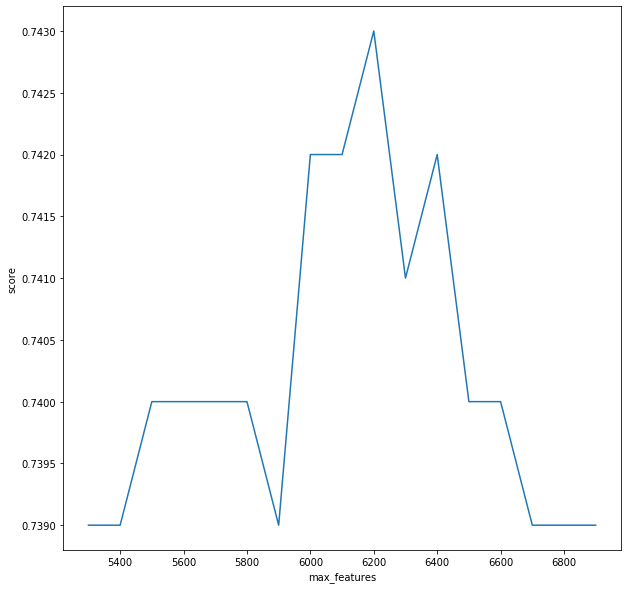

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data = log_regn, x = 'max_features', y = 'score')
plt.show()

In [7]:
#Count vectorizer Document term matrix

count_vecto = CountVectorizer(stop_words = my_stop_words, max_features = 6200, ngram_range = (1,3))
count_vecto_fit = count_vecto.fit(X_train['clean_text'])

count_train = count_vecto_fit.transform(X_train['clean_text'])
count_test = count_vecto_fit.transform(X_test['clean_text'])

X_train_vect = pd.concat([X_train[['hash_count', 'emoji_count', 'anger','anticipation','disgust','fear',
                                                       'joy', 'sadness', 'surprise', 'trust', 'punc_count',
                                                       'tweet_len','cap_count']].reset_index(drop=True), 
           pd.DataFrame(count_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['hash_count', 'emoji_count', 'anger','anticipation','disgust','fear',
                                                       'joy', 'sadness', 'surprise', 'trust', 'punc_count',
                                                       'tweet_len','cap_count']].reset_index(drop=True), 
           pd.DataFrame(count_test.toarray())], axis=1)

In [8]:
X_train_vect.shape

(70008, 6213)

In [9]:
#Balance train Data 
ros = RandomOverSampler(random_state=77)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train_vect.values, y_train.values)
print(sorted(Counter(y_resampled_ros).items()))

[(0, 23522), (1, 23522), (2, 23522), (3, 23522), (4, 23522), (5, 23522)]


In [10]:
#Balance test data
X_resampled_ros_test, y_resampled_ros_test = ros.fit_resample(X_test_vect.values, y_test.values)
print(sorted(Counter(y_resampled_ros_test).items()))

[(0, 5982), (1, 5982), (2, 5982), (3, 5982), (4, 5982), (5, 5982)]


In [11]:
#Scale data
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_resampled_ros)
X_test_scaled = preprocessing.scale(X_resampled_ros_test)

In [12]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 20, solver = 'sag', multi_class = 'multinomial', C = 0.01)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fit time: 364.201 / Predict time: 2.023 ---- Precision: 0.747 / Recall: 0.742 / Accuracy: 0.742


In [13]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 25, solver = 'sag', multi_class = 'multinomial', C = 0.01)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fit time: 429.406 / Predict time: 0.197 ---- Precision: 0.746 / Recall: 0.742 / Accuracy: 0.742


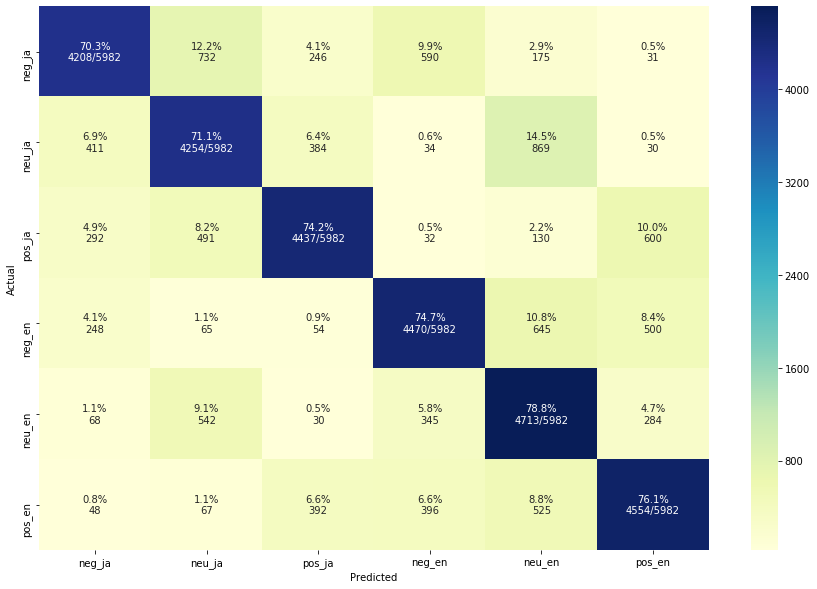

In [33]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_resampled_ros_test, y_pred)
class_names = ['neg_ja', 'neu_ja', 'pos_ja', 'neg_en', 'neu_en', 'pos_en']


def plot_cm(y_true, y_pred, figsize=(15,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_cm(y_resampled_ros_test, y_pred)
plt.show()

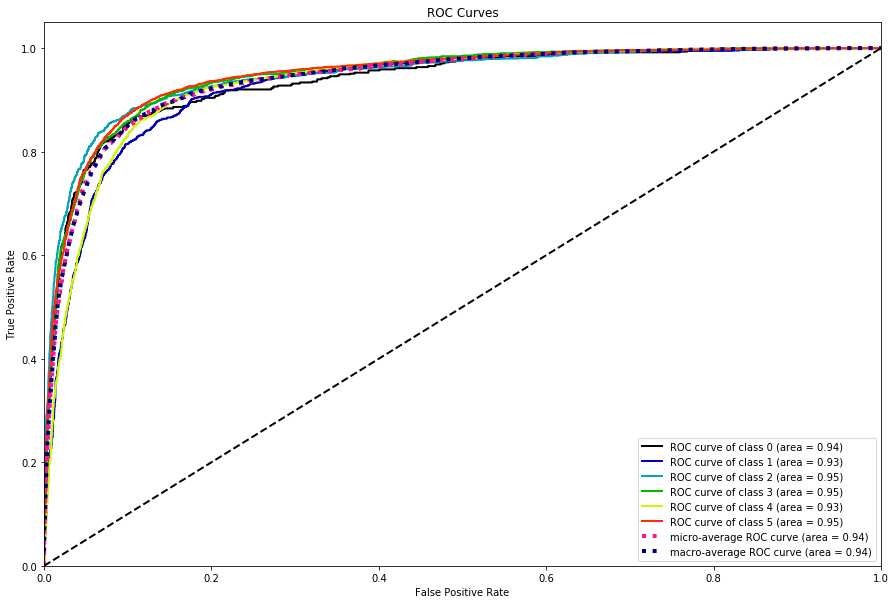

In [15]:
#ROC AUC
import scikitplot as scikitplot #to make things easy
y_pred_proba = lr.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_resampled_ros_test, y_pred_proba, figsize=(15,10))
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score

y_prob = lr.predict_proba(X_test_scaled)

macro_roc_auc_ovo = roc_auc_score(y_resampled_ros_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_resampled_ros_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_resampled_ros_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_resampled_ros_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.940119 (macro),
0.940119 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.940119 (macro),
0.940119 (weighted by prevalence)


In [ ]:
#Experimenting to increase the Score 

In [13]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 50, solver = 'sag', multi_class = 'multinomial', C = 0.01)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fit time: 749.659 / Predict time: 1.5 ---- Precision: 0.743 / Recall: 0.739 / Accuracy: 0.739


In [14]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 10, solver = 'sag', multi_class = 'multinomial', C = 0.01)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

Fit time: 148.932 / Predict time: 0.165 ---- Precision: 0.737 / Recall: 0.731 / Accuracy: 0.731


/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
